In [1]:
# flow.ipynb

# To use persistence diagrams on time series data, you need to follow these
# steps:

# 1. Convert the time series data into a point cloud in a higher-dimensional
# space. One common method to achieve this is using the sliding window
# (also called time-delay embedding) technique. This method creates a new
# point for every window of consecutive data points in the time series.
# The dimensionality of the point cloud will be equal to the window size.

# 2. Compute the persistent homology of the point cloud. This involves
# constructing a filtration (a nested sequence of simplicial complexes) on the
# point cloud and tracking the birth and death of topological features
# (connected components, loops, etc.) as the filtration progresses.

# 3. Construct the persistence diagram using the results of persistent
# homology. In a persistence diagram, each point (x, y) represents a
# topological feature that is born at scale x and dies at scale y. The
# persistence of the feature is given by y - x.

In [2]:
# imports
import numpy as np
import pandas as pd
import gudhi as gd
import matplotlib.pyplot as plt

In [3]:
# utility
def read_excel_fx(PATH: str) -> pd.DataFrame:
    ''' read_excel_fx:
        - Read time series data from latam countries
    '''
    df_headers = ['dt', 'PER', 'COL', 'CHI', 'MEX', 'BRA']
    df = pd.read_excel(PATH, skiprows=5)
    df.columns = df_headers
    return df

def preprocessing():
    ''' preprocessing:
        - data acquisition (time series)
        - cleaning and normalization (TODO)
        - log useful metrics (TODO)
    '''
    fx_data = read_excel_fx('data/fx_latam.xlsx')
    fx_data = fx_data[['dt', 'PER']]
    return fx_data

def df_to_series(col: str, df: pd.DataFrame):
    ''' df_to_series:
        - Convert dataframe with column 'col' to numpy t.series
    '''
    time_series = df[col].to_numpy()
    return time_series

In [8]:
# main
df = preprocessing()
df = df[df['dt'] >= '2020-01-01'] # 2020 en adelante
time_series = df_to_series('PER', df)
#time_series

In [10]:
# Convert the time series to a point cloud using the sliding window method
window_size = 5
point_cloud = [time_series[i:i + window_size] for i in range(len(time_series) - window_size)]

In [11]:
# Compute the persistent homology using the Rips complex
rips_complex = gd.RipsComplex(points=point_cloud)

In [13]:
# Create simplex tree
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

In [14]:
# Create persistence
persistence = simplex_tree.persistence()

<AxesSubplot:title={'center':'Persistence barcode'}>

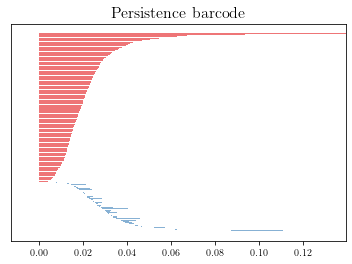

In [15]:
# Persistence barcode
gd.plot_persistence_barcode(persistence=persistence)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

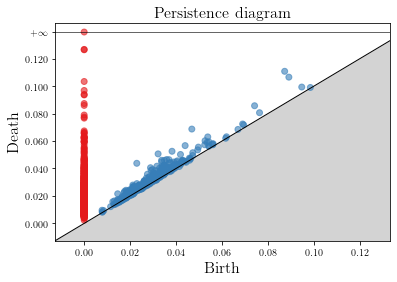

In [16]:
# Persistence diagram
gd.plot_persistence_diagram(persistence=persistence)